# Knowledge Distillation in MNIST Dataset

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras_flops import get_flops

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use('_mpl-gallery')

from Utilities import *

# Data loading

In [2]:
mnist_train, mnist_test = loadMnist()

# Load Teacher and Student Models

In [3]:
teacherModel = getTeacherModel()
studenModel = getStudentModel()
fc_model_no_distillation = getStudentModel()


# Train teacher and Student using default temprature

In [4]:
# Training Teacher model
teacherTrainACC, teacherTestAcc = train_evaluate(teacherModel,mnist_train,mnist_test)
testModel(teacherModel,mnist_test)

# Training student model using KD
studentTrainKdACC, studentTestKdACC = train_and_evaluate_using_KD(studenModel,teacherModel,mnist_train,mnist_test,0.5,10)
testModel(studenModel,mnist_test)

# Training student model from scratch
studentTrainACC, studentTestACC = train_evaluate(fc_model_no_distillation,mnist_train,mnist_test)
testModel(fc_model_no_distillation,mnist_test)


Epoch 1: Training Accuracy: 97.82 and Testing Accuracy:98.07
Epoch 2: Training Accuracy: 98.61 and Testing Accuracy:98.66
Epoch 3: Training Accuracy: 98.92 and Testing Accuracy:98.82
Epoch 4: Training Accuracy: 99.05 and Testing Accuracy:98.90
Epoch 5: Training Accuracy: 99.10 and Testing Accuracy:98.91
Epoch 6: Training Accuracy: 99.37 and Testing Accuracy:99.03
Epoch 7: Training Accuracy: 99.40 and Testing Accuracy:99.06
Epoch 8: Training Accuracy: 99.33 and Testing Accuracy:99.09
Epoch 9: Training Accuracy: 99.49 and Testing Accuracy:99.08
Epoch 10: Training Accuracy: 99.54 and Testing Accuracy:99.18
Epoch 11: Training Accuracy: 99.60 and Testing Accuracy:99.20
Epoch 12: Training Accuracy: 99.57 and Testing Accuracy:99.15
model Testing Accuracy: 99.15%
Epoch 1: Training Accuracy: 96.81 and Testing Accuracy:96.43
Epoch 2: Training Accuracy: 98.01 and Testing Accuracy:97.23
Epoch 3: Training Accuracy: 98.63 and Testing Accuracy:97.91
Epoch 4: Training Accuracy: 98.83 and Testing Accur

<tf.Tensor: shape=(), dtype=float32, numpy=98.25>

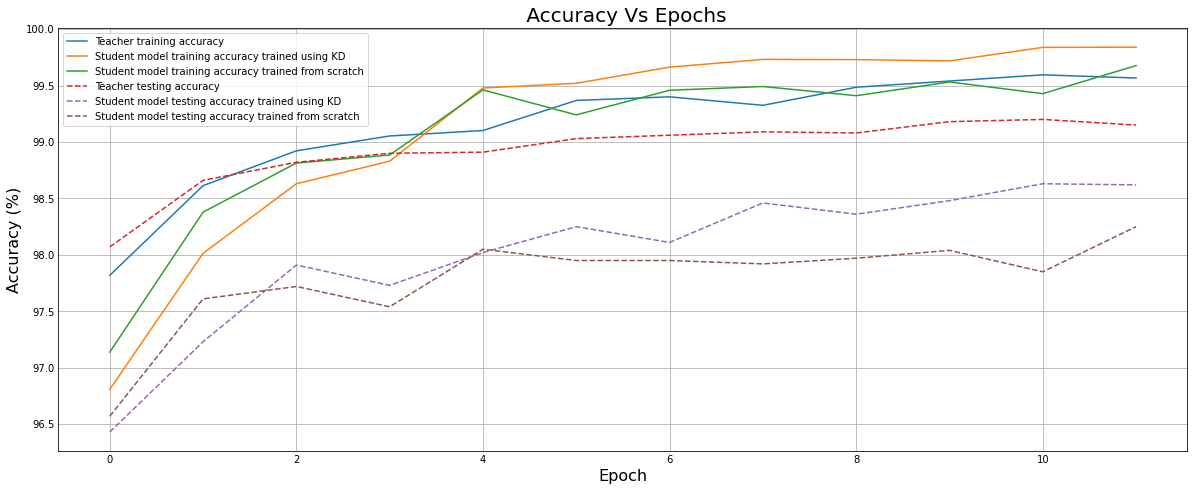

In [22]:
f, ax = plt.subplots(figsize=(16, 6))

ax.plot(teacherTrainACC, label = "Teacher training accuracy")
ax.plot(studentTrainKdACC, label = 'Student model training accuracy trained using KD')
ax.plot(studentTrainACC, label = 'Student model training accuracy trained from scratch')
ax.plot(teacherTestAcc,'--', label = "Teacher testing accuracy")
ax.plot(studentTestKdACC,'--', label = 'Student model testing accuracy trained using KD')
ax.plot(studentTestACC,'--', label = 'Student model testing accuracy trained from scratch')
ax.set_xlabel('Epoch', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Accuracy Vs Epochs', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig3.png', bbox_inches='tight')


# Test accuracy vs. tempreture curve

In [6]:
testACC = []
tempratureValues = [1, 2, 4, 16, 32, 64]
for temp in tempratureValues:
    st = getStudentModel()
    train_and_evaluate_using_KD(st,teacherModel,mnist_train,mnist_test,0.5, temp)
    testACC += [float(testModel(st,mnist_test))]

Epoch 1: Training Accuracy: 97.57 and Testing Accuracy:97.14
Epoch 2: Training Accuracy: 98.37 and Testing Accuracy:97.58
Epoch 3: Training Accuracy: 98.77 and Testing Accuracy:97.84
Epoch 4: Training Accuracy: 99.27 and Testing Accuracy:98.05
Epoch 5: Training Accuracy: 99.13 and Testing Accuracy:97.67
Epoch 6: Training Accuracy: 99.34 and Testing Accuracy:97.88
Epoch 7: Training Accuracy: 99.56 and Testing Accuracy:98.14
Epoch 8: Training Accuracy: 99.52 and Testing Accuracy:97.92
Epoch 9: Training Accuracy: 99.24 and Testing Accuracy:97.90
Epoch 10: Training Accuracy: 99.54 and Testing Accuracy:98.17
Epoch 11: Training Accuracy: 99.69 and Testing Accuracy:98.19
Epoch 12: Training Accuracy: 99.55 and Testing Accuracy:98.04
model Testing Accuracy: 98.04%
Epoch 1: Training Accuracy: 96.91 and Testing Accuracy:96.31
Epoch 2: Training Accuracy: 98.49 and Testing Accuracy:97.70
Epoch 3: Training Accuracy: 98.79 and Testing Accuracy:97.48
Epoch 4: Training Accuracy: 99.13 and Testing Accur

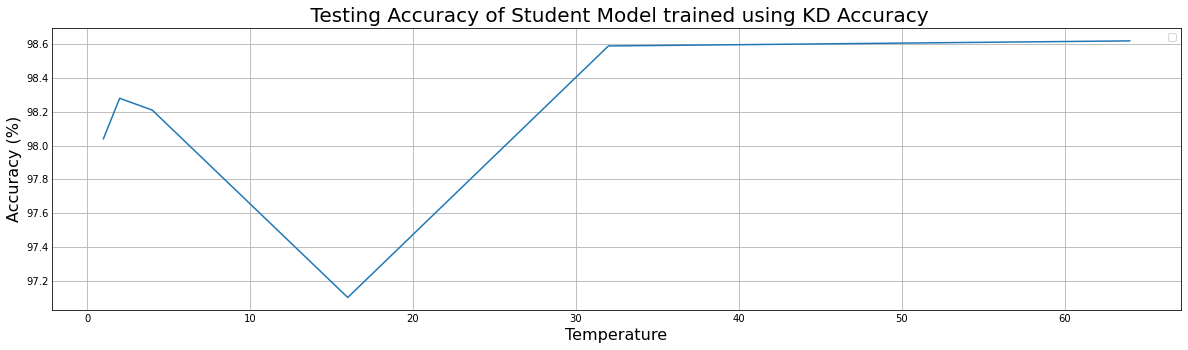

In [7]:
f, ax = plt.subplots(figsize=(16, 4))

ax.plot(tempratureValues,testACC )
ax.set_xlabel('Temperature', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Testing Accuracy of Student Model trained using KD Accuracy', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig4.png', bbox_inches='tight')

# Comparing the teacher and student model (number of of parameters and FLOPs) 

In [8]:
# Teacher Model Summary
print( teacherModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 23, 23, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                    

In [9]:
# Teacher Model FLOPs
flops = get_flops(teacherModel, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


FLOPS: 0.022 G


In [10]:
# Student Model Trainable Parameters
print(studenModel.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               615440    
                                                                 
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Student Model Flops
flops = get_flops(studenModel, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

FLOPS: 0.00248 G


# Implementing the state-of-the-art KD algorithm

In [13]:
teachingAssistant = getTeachingAssistantModel()
teachingAssistantTrainingAcc, teachingAssistantTestingAcc = train_and_evaluate_using_KD(teachingAssistant,teacherModel,mnist_train,mnist_test,0.5,10)
testModel(teachingAssistant,mnist_test)
student = getStudentModel()
studentTrainACC2, studentTestACC2  = train_and_evaluate_using_KD(student,teachingAssistant,mnist_train,mnist_test,0.5,10)
testModel(student,mnist_test)

Epoch 1: Training Accuracy: 97.31 and Testing Accuracy:96.82
Epoch 2: Training Accuracy: 98.29 and Testing Accuracy:97.36
Epoch 3: Training Accuracy: 98.90 and Testing Accuracy:97.51
Epoch 4: Training Accuracy: 98.91 and Testing Accuracy:97.79
Epoch 5: Training Accuracy: 99.13 and Testing Accuracy:97.92
Epoch 6: Training Accuracy: 99.14 and Testing Accuracy:97.83
Epoch 7: Training Accuracy: 99.28 and Testing Accuracy:97.94
Epoch 8: Training Accuracy: 99.47 and Testing Accuracy:98.07
Epoch 9: Training Accuracy: 99.43 and Testing Accuracy:97.93
Epoch 10: Training Accuracy: 99.39 and Testing Accuracy:97.91
Epoch 11: Training Accuracy: 99.53 and Testing Accuracy:98.26
Epoch 12: Training Accuracy: 99.48 and Testing Accuracy:98.13
model Testing Accuracy: 98.13%
Epoch 1: Training Accuracy: 96.78 and Testing Accuracy:96.54
Epoch 2: Training Accuracy: 98.30 and Testing Accuracy:97.32
Epoch 3: Training Accuracy: 98.71 and Testing Accuracy:97.58
Epoch 4: Training Accuracy: 99.17 and Testing Accur

<tf.Tensor: shape=(), dtype=float32, numpy=98.58>

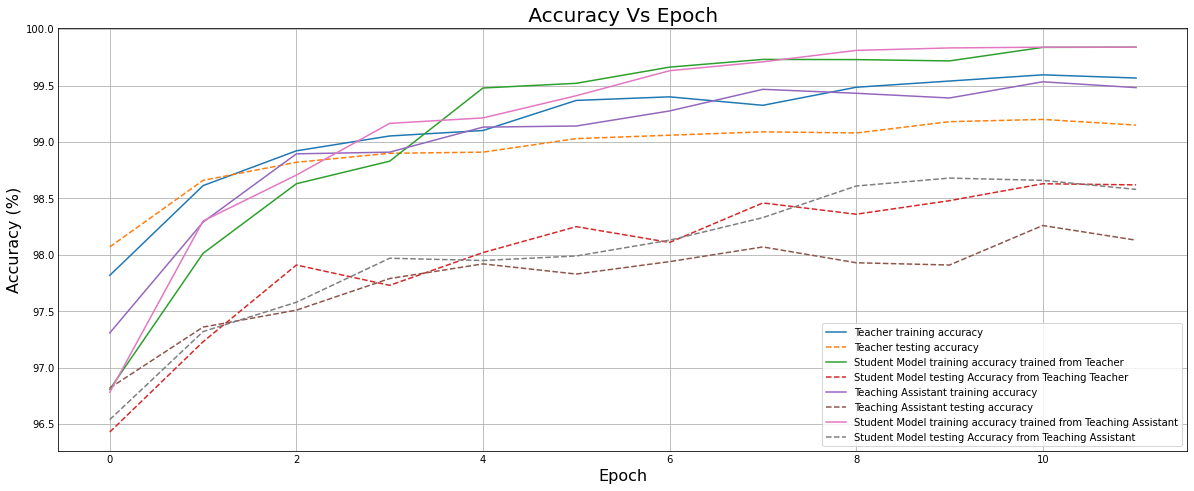

In [23]:
f, ax = plt.subplots(figsize=(16, 6))

ax.plot(teacherTrainACC, label = "Teacher training accuracy")
ax.plot(teacherTestAcc,'--', label = "Teacher testing accuracy")

ax.plot(studentTrainKdACC, label = 'Student Model training accuracy trained from Teacher')
ax.plot(studentTestKdACC, '--', label = 'Student Model testing Accuracy from Teaching Teacher')

ax.plot(teachingAssistantTrainingAcc, label = 'Teaching Assistant training accuracy')
ax.plot(teachingAssistantTestingAcc, '--',label = "Teaching Assistant testing accuracy")

ax.plot(studentTrainACC2, label = 'Student Model training accuracy trained from Teaching Assistant')
ax.plot(studentTestACC2, '--',label = 'Student Model testing Accuracy from Teaching Assistant')

ax.set_xlabel('Epoch', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Accuracy Vs Epoch ', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig6.png', bbox_inches='tight')